# **SUPPORT VECTOR MACHINE**

**Exploratory Data Analysis (EDA)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/mushroom.csv')

In [3]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [4]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


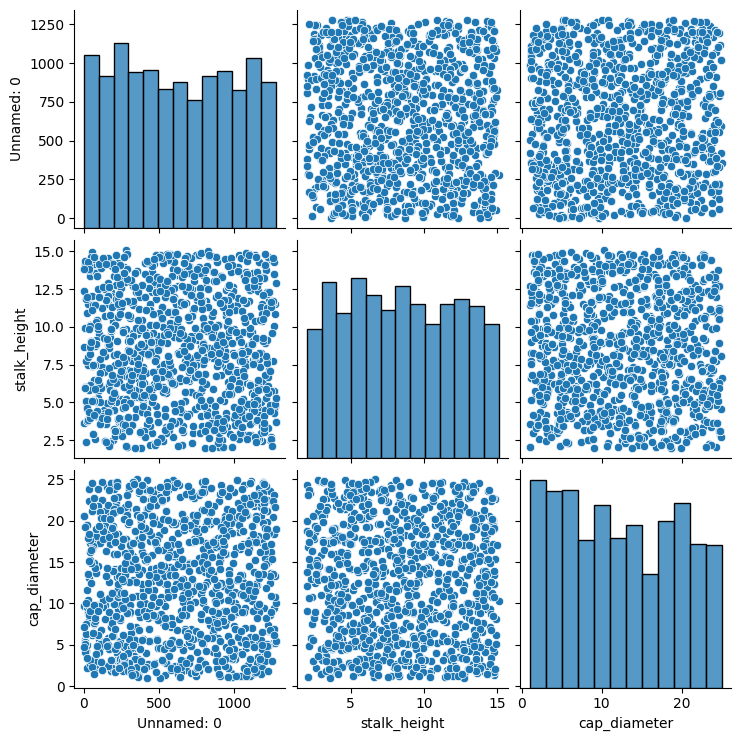

In [5]:
sns.pairplot(df)

In [6]:
print(df['class'].value_counts())

class
poisonous    1400
edible        600
Name: count, dtype: int64


 Visualize Feature Distributions

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

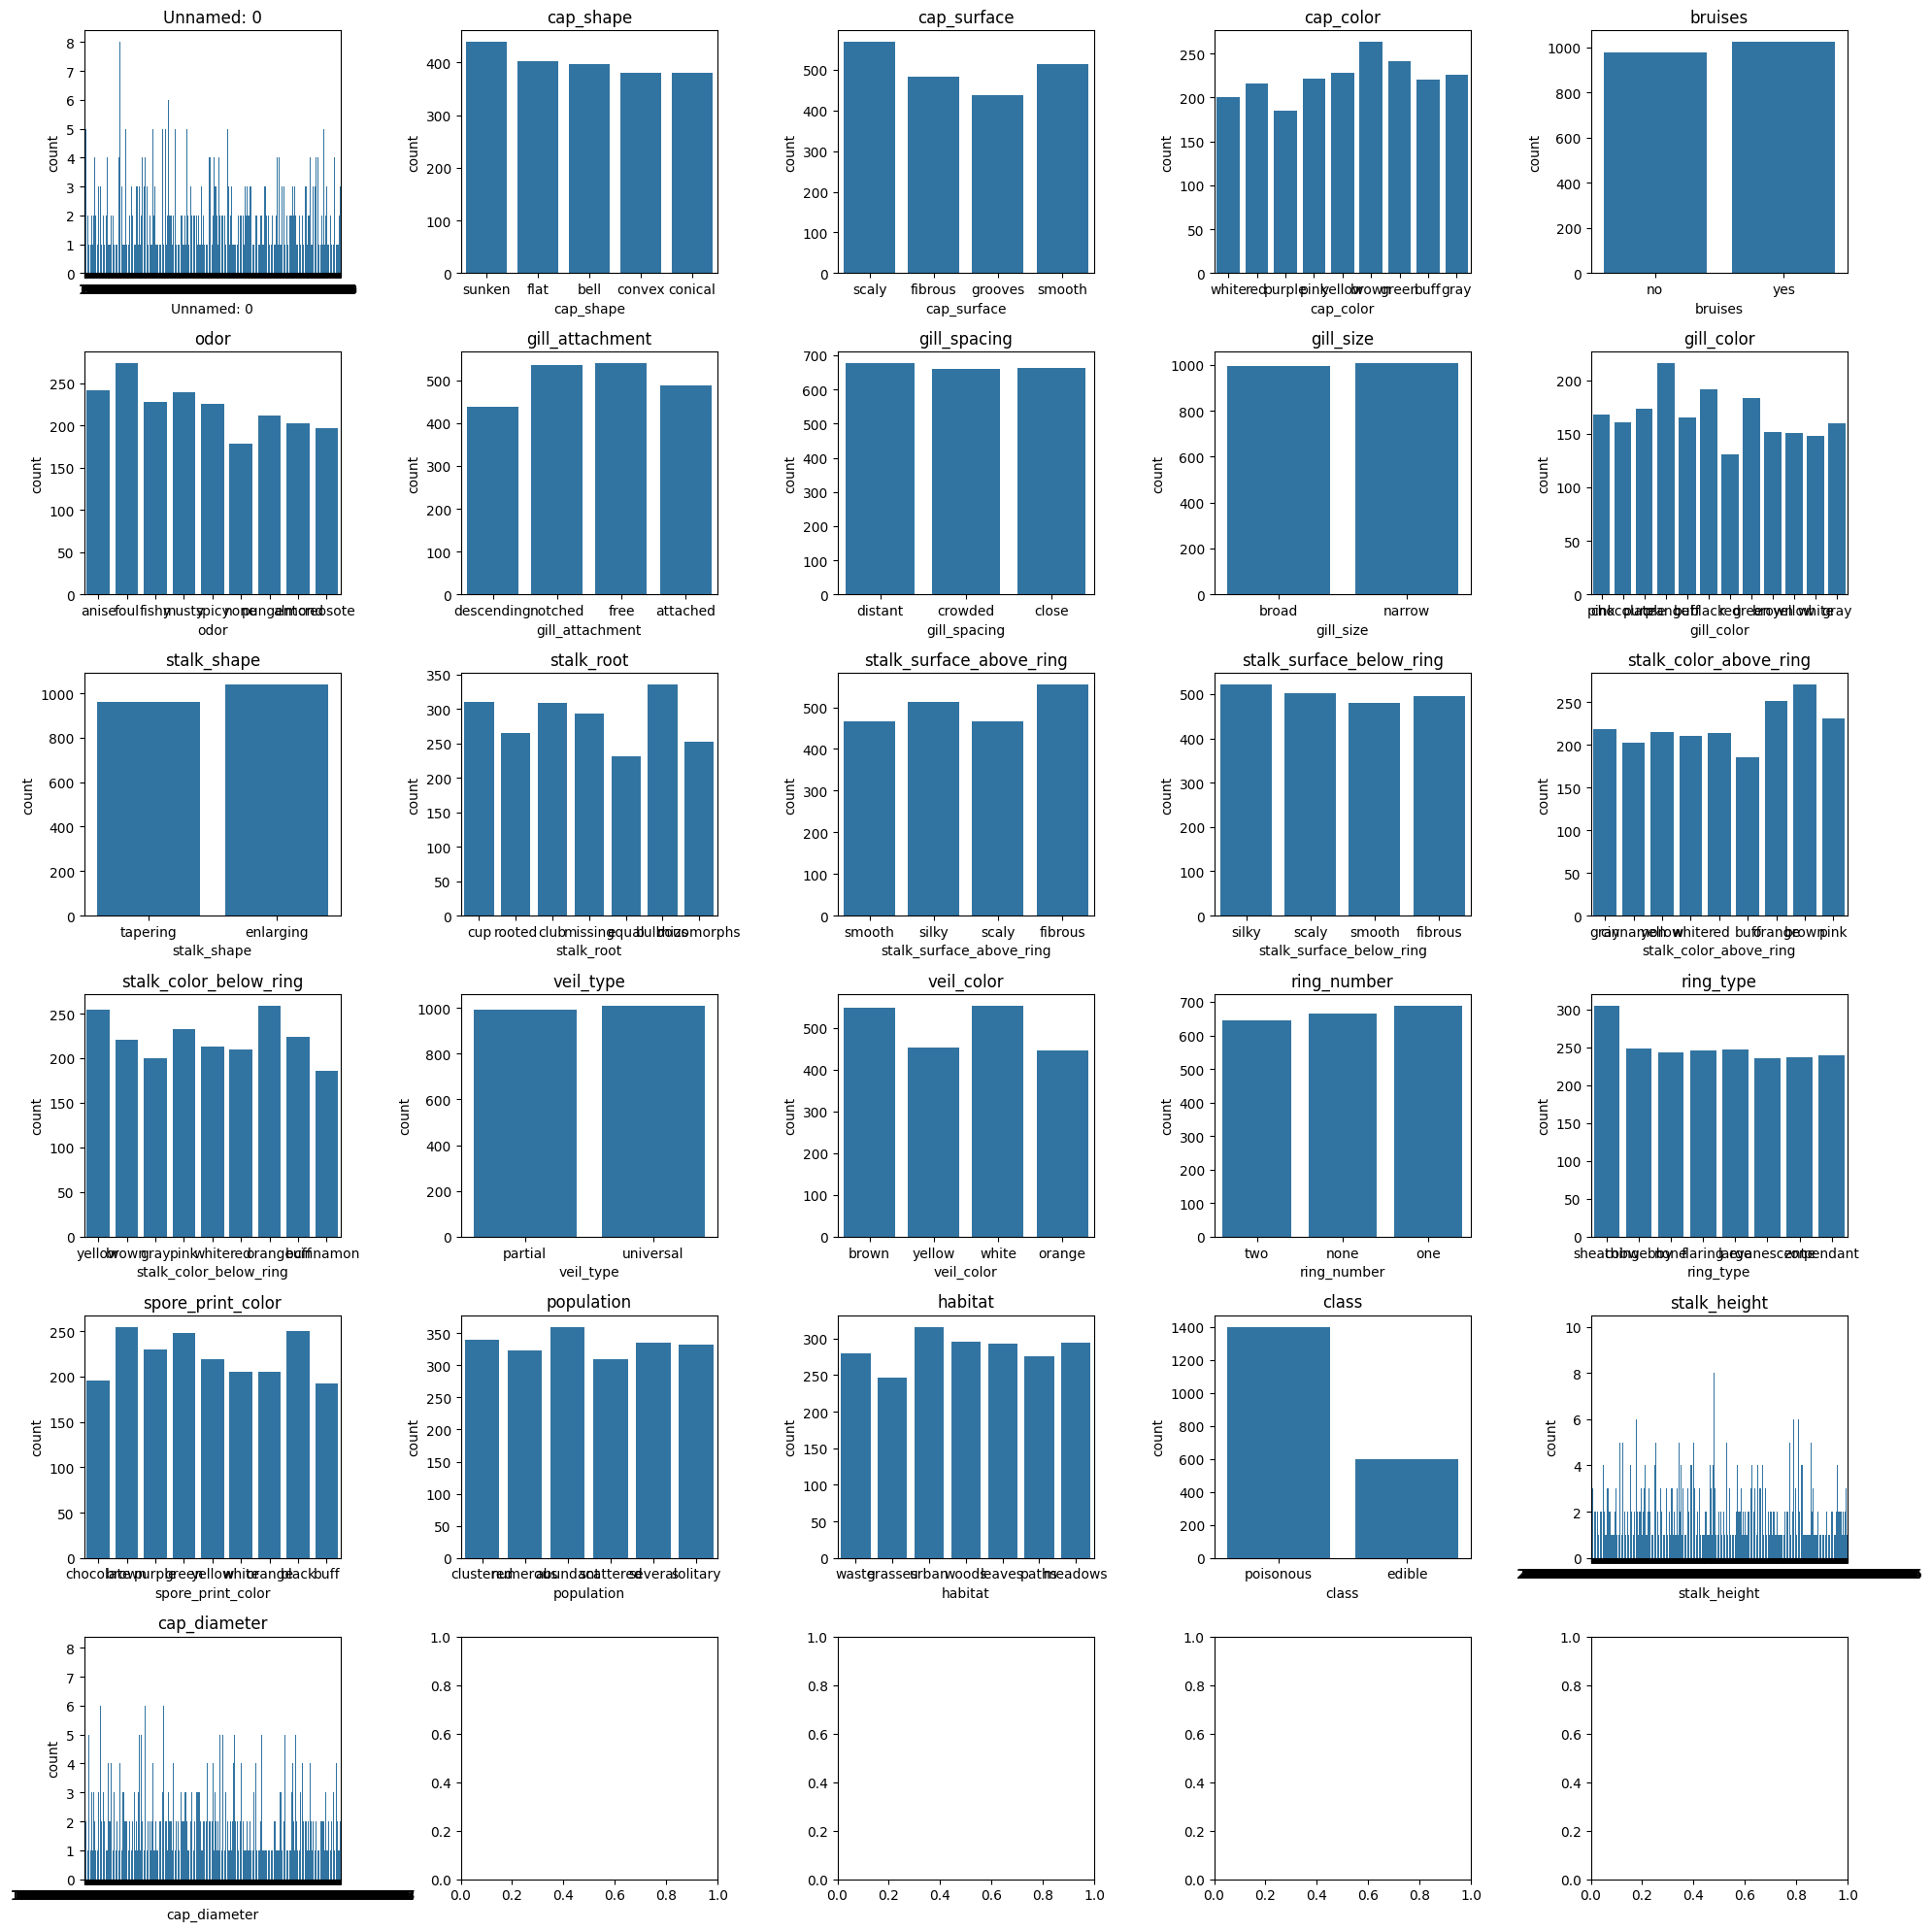

In [8]:
# Plotting the distribution of features
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 20))
for i, column in enumerate(df.columns):
    sns.countplot(data=df, x=column, ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(column)
plt.tight_layout()
plt.show()

Investigate Feature Correlations

In [9]:
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))


In [11]:
# Initialize a DataFrame to store Cramér's V values
columns = df.columns
cramers_v_matrix = pd.DataFrame(index=columns, columns=columns)


In [12]:
# Calculate Cramér's V for each pair of categorical features
for col1 in columns:
    for col2 in columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0  # Perfect correlation with itself
        else:
            cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])


In [13]:
# Convert the matrix to float for visualization
cramers_v_matrix = cramers_v_matrix.astype(float)

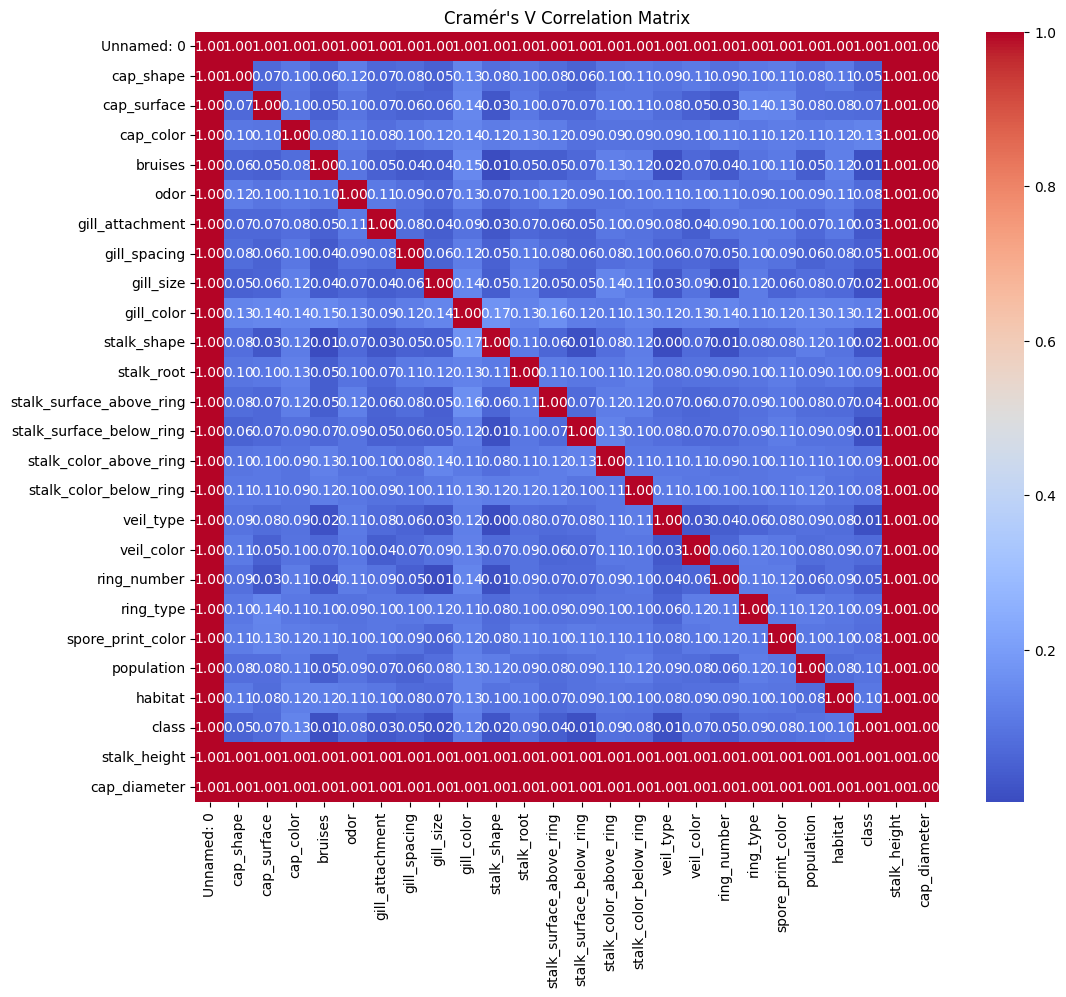

In [14]:
# Display the Cramér's V correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_v_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Cramér's V Correlation Matrix")
plt.show()

 **Data Preprocessing**

Encode Categorical Variables

In [15]:
# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df)

In [16]:
# Display the first few rows of the encoded dataset
print(df_encoded.head())

   Unnamed: 0  stalk_height  cap_diameter  cap_shape_bell  cap_shape_conical  \
0        1167     14.276173      5.054983           False              False   
1        1037      3.952715     19.068319           False              False   
2         309      9.054265      7.205884           False              False   
3         282      5.226499     20.932692            True              False   
4         820     14.037532     12.545245           False              False   

   cap_shape_convex  cap_shape_flat  cap_shape_sunken  cap_surface_fibrous  \
0             False           False              True                False   
1             False           False              True                 True   
2             False            True             False                False   
3             False           False             False                False   
4             False            True             False                False   

   cap_surface_grooves  ...  population_solitary  

Split the Dataset into Training and Testing Sets

In [17]:
# Split the dataset into features (X) and target (y)
X = df_encoded.drop('class_edible', axis=1)  # 'class_e' represents edible, 'class_p' represents poisonous
y = df_encoded['class_edible']

In [18]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Data Visualization**

In [19]:
from sklearn.decomposition import PCA

# Reduce to two dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [20]:
# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['class'] = y


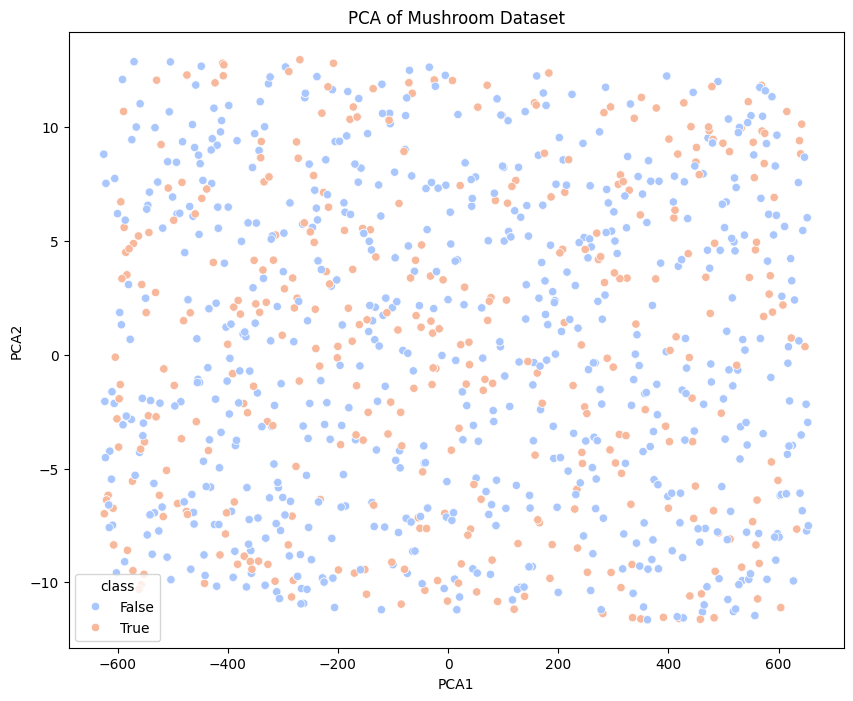

In [21]:
# Scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='class', palette='coolwarm')
plt.title('PCA of Mushroom Dataset')
plt.show()

# SVM Implementation

 Implementing a Basic SVM Classifier


In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [23]:
# Implementing the SVM classifier
svm = SVC(kernel='linear', random_state=42)

In [24]:
# Training the SVM model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [25]:
# Making predictions
y_pred = svm.predict(X_test)

Evaluate Model Performance

In [26]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [27]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       267
        True       1.00      1.00      1.00       133

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



# Parameter Tuning and Optimization

In [31]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']}



In [32]:
# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')

In [ ]:
grid = GridSearchCV(SVC(),param_grid=params,verbose=1) # try verbose = 0

In [ ]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)